In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [6]:
gameweek = pd.read_csv('../Fantasy-Premier-League/data/2021-22/gws/merged_gw.csv')
pd.set_option("display.max_columns",None)
sns.set_theme() # To apply basic seaborn theme


In [56]:
gameweek.sample(5,random_state=0)
columns = gameweek.columns

# If you play then your shape elo is afeected, I think that is only fair to update palyer elo.
#Last game played using kickoff time
# print(gameweek.shape)

Some features that need to be created: 
- elo based on a player which only updates if player was involved in a game : temporal
- played or not played indicator.
- last time a player was involved : temporal debateable at the moment if this will add any value.
- Home and Away indicator : Completed
- position catergorical variables update [0,0,0] = keeper [0,0,1] = defender [0,1,0] = midfielder [1,0,0] = forward :Completed
- 

In [31]:
gameweek.query("position == 'FWD' & round == 9") # I like this very much easier to read


,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,was_home_ind
4744,Keinan Davis,FWD,Aston Villa,-0.1,0,0,0,0,0.0,49,81,0,0,0.0,0.0,2021-10-22T19:00:00Z,0,1,0,0,0,0,9,0,149750,1,3,0.0,0,17809,30650,12841,44,False,0,9,0
4750,Moise Kean,FWD,Everton,0.0,0,0,0,0,0.0,564,86,0,0,0.0,0.0,2021-10-23T14:00:00Z,0,18,0,0,0,0,9,0,1233,5,2,0.0,0,-24,0,24,60,True,0,9,1
4760,Joshua King,FWD,Watford,4.5,0,3,72,0,12.9,468,86,2,3,24.1,106.4,2021-10-23T14:00:00Z,90,8,0,0,0,0,9,0,55745,5,2,122.0,16,-6047,3096,9143,55,False,1,9,0
4761,Richarlison de Andrade,FWD,Everton,2.0,0,0,25,0,14.5,180,86,4,1,7.7,39.2,2021-10-23T14:00:00Z,30,18,0,0,0,0,9,0,338072,5,2,23.0,4,412,16894,16482,74,True,1,9,1
4774,Armando Broja,FWD,Southampton,4.7,0,2,28,0,1.2,518,89,2,1,7.6,33.6,2021-10-23T14:00:00Z,78,5,0,0,0,0,9,0,101480,2,2,41.0,8,50958,57469,6511,50,True,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5303,Juan Camilo Hernández Suárez,FWD,Watford,0.8,1,0,22,0,61.5,472,86,2,0,12.2,27.2,2021-10-23T14:00:00Z,90,8,0,0,0,0,9,0,130577,5,2,33.0,5,-6546,3821,10367,50,False,0,9,0
5306,Daniel N'Lundulu,FWD,Southampton,0.0,0,0,0,0,0.0,344,89,0,0,0.0,0.0,2021-10-23T14:00:00Z,0,5,0,0,0,0,9,0,1384,2,2,0.0,0,-35,0,35,45,True,0,9,1
5342,Halil Dervişoğlu,FWD,Brentford,0.0,0,0,0,0,0.0,95,82,0,0,0.0,0.0,2021-10-24T13:00:00Z,0,9,0,0,0,0,9,0,1320,2,1,0.0,0,-50,0,50,54,True,0,9,1
5347,Jordan Hugill,FWD,Norwich,0.0,0,0,0,0,0.0,322,84,0,0,0.0,0.0,2021-10-23T11:30:00Z,0,6,0,0,0,0,9,0,973,0,7,0.0,0,-41,0,41,54,False,0,9,0


In [30]:

# home and away indicator

gameweek['was_home_ind'] =gameweek['was_home'].replace({True: 1, False: 0})
gameweek


Index(['was_home'], dtype='object')


,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,was_home_ind
0,Eric Bailly,DEF,Man Utd,0.0,0,0,0,0,0.0,286,6,0,0,0.0,0.0,2021-08-14T11:30:00Z,0,10,0,0,0,0,1,0,9363,1,5,0.0,0,0,0,0,50,True,0,1,1
1,Keinan Davis,FWD,Aston Villa,0.4,0,0,0,0,0.0,49,8,0,0,0.0,0.0,2021-08-14T14:00:00Z,0,18,0,0,0,0,1,0,169789,2,3,0.0,0,0,0,0,45,False,0,1,0
2,Ayotomiwa Dele-Bashiru,MID,Watford,0.0,0,0,0,0,0.0,394,8,0,0,0.0,0.0,2021-08-14T14:00:00Z,0,2,0,0,0,0,1,0,4092,2,3,0.0,0,0,0,0,45,True,0,1,1
3,James Ward-Prowse,MID,Southampton,2.3,0,0,20,0,30.5,341,4,3,0,5.2,21.6,2021-08-14T14:00:00Z,90,8,0,0,0,0,1,0,299682,1,3,0.0,2,0,0,0,65,False,0,1,0
4,Bruno Miguel Borges Fernandes,MID,Man Utd,4.4,0,3,61,0,35.9,277,6,1,3,20.1,106.2,2021-08-14T11:30:00Z,90,10,0,0,0,0,1,0,3381004,1,5,59.0,20,0,0,0,120,True,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24560,Wilfred Ndidi,MID,Leicester,0.0,0,0,0,0,0.0,216,377,0,0,0.0,0.0,2022-05-22T15:00:00Z,0,16,0,0,0,0,38,0,70366,1,4,0.0,0,-202,22,224,48,True,0,38,1
24561,Matt Ritchie,DEF,Newcastle,0.9,0,0,3,0,0.0,292,374,0,0,0.0,0.0,2022-05-22T15:00:00Z,1,5,0,0,0,0,38,0,15999,2,1,0.0,1,143,396,253,49,False,0,38,0
24562,Nathan Redmond,MID,Southampton,3.4,0,0,5,0,0.0,336,377,3,0,0.0,0.0,2022-05-22T15:00:00Z,82,9,0,0,0,0,38,0,13856,1,4,0.0,2,455,683,228,59,False,0,38,0
24563,Mathew Ryan,GK,Brighton,0.0,0,0,0,0,0.0,65,373,0,0,0.0,0.0,2022-05-22T15:00:00Z,0,19,0,0,0,0,38,0,587,1,3,0.0,0,-2,0,2,45,True,0,38,1


PD

In [38]:


# position = pd.Series(['GK','DEF','MID','FWD'])


position = pd.get_dummies(gameweek,columns=['position'])
position


,name,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,was_home_ind,position_DEF,position_FWD,position_GK,position_MID
0,Eric Bailly,Man Utd,0.0,0,0,0,0,0.0,286,6,0,0,0.0,0.0,2021-08-14T11:30:00Z,0,10,0,0,0,0,1,0,9363,1,5,0.0,0,0,0,0,50,True,0,1,1,1,0,0,0
1,Keinan Davis,Aston Villa,0.4,0,0,0,0,0.0,49,8,0,0,0.0,0.0,2021-08-14T14:00:00Z,0,18,0,0,0,0,1,0,169789,2,3,0.0,0,0,0,0,45,False,0,1,0,0,1,0,0
2,Ayotomiwa Dele-Bashiru,Watford,0.0,0,0,0,0,0.0,394,8,0,0,0.0,0.0,2021-08-14T14:00:00Z,0,2,0,0,0,0,1,0,4092,2,3,0.0,0,0,0,0,45,True,0,1,1,0,0,0,1
3,James Ward-Prowse,Southampton,2.3,0,0,20,0,30.5,341,4,3,0,5.2,21.6,2021-08-14T14:00:00Z,90,8,0,0,0,0,1,0,299682,1,3,0.0,2,0,0,0,65,False,0,1,0,0,0,0,1
4,Bruno Miguel Borges Fernandes,Man Utd,4.4,0,3,61,0,35.9,277,6,1,3,20.1,106.2,2021-08-14T11:30:00Z,90,10,0,0,0,0,1,0,3381004,1,5,59.0,20,0,0,0,120,True,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24560,Wilfred Ndidi,Leicester,0.0,0,0,0,0,0.0,216,377,0,0,0.0,0.0,2022-05-22T15:00:00Z,0,16,0,0,0,0,38,0,70366,1,4,0.0,0,-202,22,224,48,True,0,38,1,0,0,0,1
24561,Matt Ritchie,Newcastle,0.9,0,0,3,0,0.0,292,374,0,0,0.0,0.0,2022-05-22T15:00:00Z,1,5,0,0,0,0,38,0,15999,2,1,0.0,1,143,396,253,49,False,0,38,0,1,0,0,0
24562,Nathan Redmond,Southampton,3.4,0,0,5,0,0.0,336,377,3,0,0.0,0.0,2022-05-22T15:00:00Z,82,9,0,0,0,0,38,0,13856,1,4,0.0,2,455,683,228,59,False,0,38,0,0,0,0,1
24563,Mathew Ryan,Brighton,0.0,0,0,0,0,0.0,65,373,0,0,0.0,0.0,2022-05-22T15:00:00Z,0,19,0,0,0,0,38,0,587,1,3,0.0,0,-2,0,2,45,True,0,38,1,0,0,1,0


In [18]:
# gameweek[(gameweek['position']=='FWD') & (gameweek['GW']==12) okay this is for practice
barchart =pd.pivot_table(gameweek, values=['value'],index=['GW'],columns=['position'], aggfunc=np.mean)


In [24]:
barchart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 1 to 38
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (value, DEF)  37 non-null     float64
 1   (value, FWD)  37 non-null     float64
 2   (value, GK)   37 non-null     float64
 3   (value, MID)  37 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB


In [42]:
# we are trying to self merge the table 

# gameweek.merge(right=gameweek, how='left',on='name') 
# gameweek is too big a file to do all these things

columns = []

temporal = gameweek.merge(right=gameweek, how='left',on='name',suffixes=['','_lag']) 



In [47]:
# okay lets start with some pivot tabels
series_temp =temporal[['round','round_lag']]
series_temp['lag'] = series_temp['round']-series_temp['round_lag']

/var/folders/p2/8nzyc2ws2ds3cgyf8s70dnww0000gn/T/ipykernel_41537/1272843087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series_temp['lag'] = series_temp['round']-series_temp['round_lag']


In [61]:
test = temporal[(series_temp['lag']==-1) | (series_temp['lag']==0) | (series_temp['lag']==1)]

test[['GW','GW_lag']]

,GW,GW_lag
0,1,1
1,1,2
38,1,1
39,1,2
74,1,1
...,...,...
865980,38,38
866017,38,38
866054,38,38
866091,38,38


In [73]:

# this 

listcolumns = columns.to_list
listcolumns = listcolumns.

append(['total_points_lag',
                            'transfers_in_lag', 
                            'transfers_out_lag',
                            'value_lag', 
                            'was_home_lag', 
                            'yellow_cards_lag', 
                            'GW_lag',
                            'selected_lag'])

AttributeError: 'function' object has no attribute 'append'

In [71]:
test.columns

Index(['name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'own_goals', 'penalties_missed', 'penalties_saved',
       'red_cards', 'round', 'saves', 'selected', 'team_a_score',
       'team_h_score', 'threat', 'total_points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards',
       'GW', 'was_home_ind', 'position_lag', 'team_lag', 'xP_lag',
       'assists_lag', 'bonus_lag', 'bps_lag', 'clean_sheets_lag',
       'creativity_lag', 'element_lag', 'fixture_lag', 'goals_conceded_lag',
       'goals_scored_lag', 'ict_index_lag', 'influence_lag',
       'kickoff_time_lag', 'minutes_lag', 'opponent_team_lag', 'own_goals_lag',
       'penalties_missed_lag', 'penalties_saved_lag', 'red_cards_lag',
       'round_lag', 'saves_lag', 'selected_lag', 'team_a_score_lag',

Create Violin plot of player performance over the course of the seasom

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:


gameweek.columns


Index(['name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'own_goals', 'penalties_missed', 'penalties_saved',
       'red_cards', 'round', 'saves', 'selected', 'team_a_score',
       'team_h_score', 'threat', 'total_points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards',
       'GW'],
      dtype='object')

In [73]:

#We need players to know if there are active minutes played
def playtime(row):
    #we want player with real game time
    if row <5:
            result = 0
    else:
            result = 1
    return result

trendviolin = (gameweek[['position','was_home','round','kickoff_time','minutes','name','total_points']]
                .assign(was_home_ind =lambda x:gameweek['was_home'].replace({False: 0,True:1}))
                # .drop('was_home',axis=1)                
                )
trendviolin['playtime'] = trendviolin['minutes'].apply(playtime)                

In [74]:
trendviolin.query("minutes > 0")  #query("position == 'DEF'")

,position,was_home,round,kickoff_time,minutes,name,total_points,was_home_ind,playtime
3,MID,False,1,2021-08-14T14:00:00Z,90,James Ward-Prowse,2,0,1
4,MID,True,1,2021-08-14T11:30:00Z,90,Bruno Miguel Borges Fernandes,20,1,1
6,MID,False,1,2021-08-14T14:00:00Z,90,James McArthur,2,0,1
9,MID,False,1,2021-08-14T14:00:00Z,76,Jairo Riedewald,2,0,1
10,MID,False,1,2021-08-14T14:00:00Z,14,Alexis Mac Allister,9,0,1
...,...,...,...,...,...,...,...,...,...
24555,GK,False,38,2022-05-22T15:00:00Z,45,John Ruddy,1,0,1
24557,DEF,False,38,2022-05-22T15:00:00Z,90,Mohammed Salisu,0,0,1
24558,MID,True,38,2022-05-22T15:00:00Z,90,N'Golo Kanté,2,1,1
24561,DEF,False,38,2022-05-22T15:00:00Z,1,Matt Ritchie,1,0,0


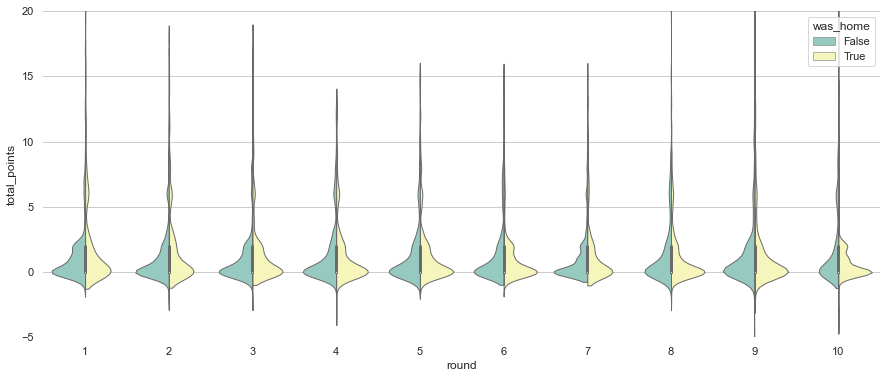

In [80]:
#Setting up the plot

f, ax = plt.subplots(figsize=(15,6))



sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home']].query(" round <11")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1)

# Finalize the figure
ax.set(ylim=(-5, 20))
sns.despine(left=True, bottom=True)

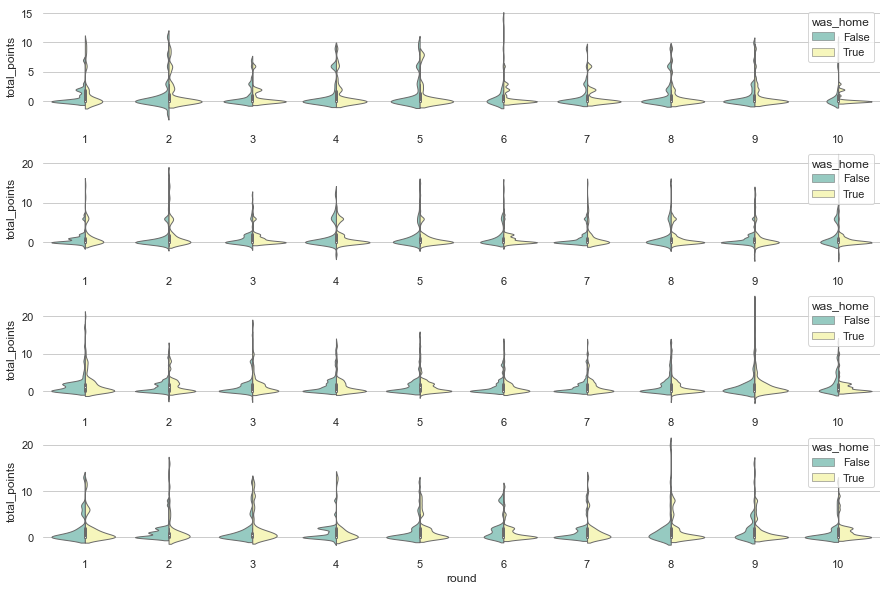

In [92]:
# create subplots of every position

f, ax = plt.subplots(4,1, figsize=(15,10))



sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'GK'")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[0])

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'DEF'")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[1])

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'MID'")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[2])

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'FWD'")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[3])

# Finalize the figure
# ax.set(ylim=(-5, 20))
sns.despine(left=True, bottom=True)

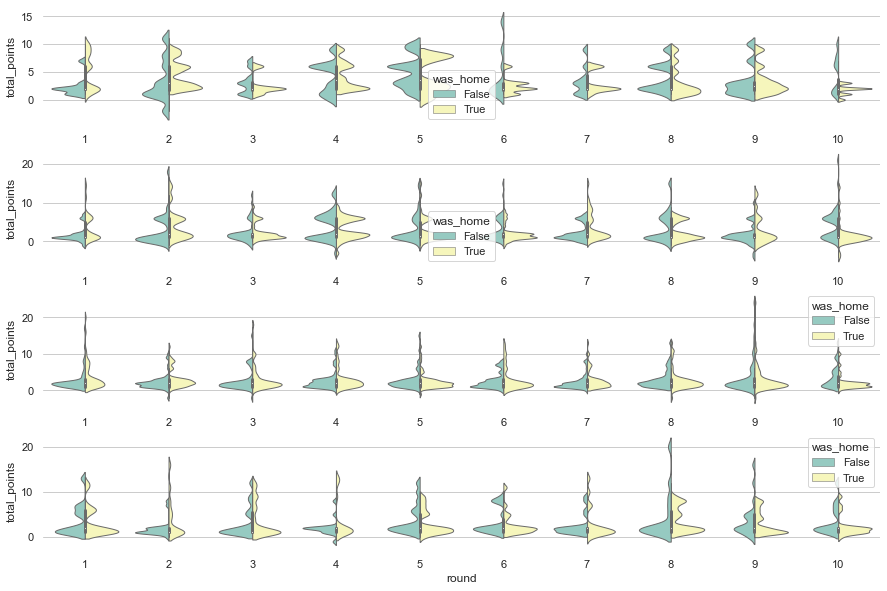

In [93]:
#with playtime minutes


f, ax = plt.subplots(4,1, figsize=(15,10))



sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'GK' & minutes > 0")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[0])

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'DEF'  & minutes > 0")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[1])

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'MID' & minutes > 0")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[2])

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'FWD' & minutes > 0")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[3])

# Finalize the figure
# ax.set(ylim=(-5, 20))
sns.despine(left=True, bottom=True)


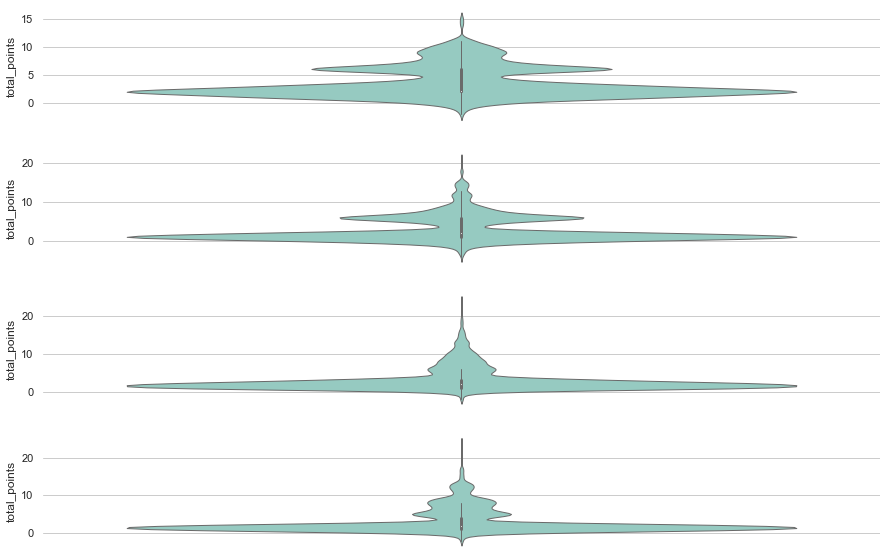

In [95]:
# lets look at overall peformance over the season

f, ax = plt.subplots(4,1, figsize=(15,10))



sns.violinplot( #x="round"
                 y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" position == 'GK' & minutes > 0")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[0])

sns.violinplot( #x="round"
                 y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query("  position == 'DEF'  & minutes > 0")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[1])

sns.violinplot( #x="round"
                 y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" position == 'MID' & minutes > 0")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[2])

sns.violinplot( #x="round"
                 y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" position == 'FWD' & minutes > 0")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[3])

# Finalize the figure
# ax.set(ylim=(-5, 20))
sns.despine(left=True, bottom=True)



In [ ]:

pd.pivot_table(trendviolin,
                    values='total_points',
                    index='position',
                    columns=['round'])